---
title: Introduction to xarray eopf backend
subtitle: A userfriendly way to open the mew EOPF Zarr products.
authors:
  - name: Konstantin Ntokas
    orcid: 0000-0002-0049-0690
    github: konstntokas
    affiliations:
      - id: Brockmann Consult GmbH
        institution: Brockmann Consult GmbH
        ror: 04r0k9g65
date: 2025-05-19
thumbnail: ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
keywords : data access, xarray, EOPF Zarr products
releaseDate: 2025-05-19
datePublished: 2025-05-19
dateModified: 2025-05-19
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

## Table of Contents
1. [Introduction](#Introduction)  
2. [Import modules](#Import-modules)
3. [Further background information on the xarray-eopf backend](#Further-background-information-on-the-xarray-eopf-backend)
4. [Open the product in native mode](#Open-the-product-in-native-mode)
5. [Open the product in analysis mode](#Open-the-product-in-analysis-mode)  

## Introduction

`xarray-eopf` is a Python package that enhances xarray by a new backend named "eopf-zarr". This backend allows for reading the ESA EOPF data products in Zarr format and representing them using analysis ready data models. This notebook demonstrates how to access EOPF Zarr products using the newly developed xarray-eopf backend and shows all the features so far included by the backend.

* GitHub: https://github.com/EOPF-Sample-Service/xarray-eopf
* Issues: https://github.com/EOPF-Sample-Service/xarray-eopf/issues
* Documentation: https://eopf-sample-service.github.io/xarray-eopf/


:::{hint} Overview
**Questions**
- How do I install the xarray-eopf backend?
- How can I use the xarray-eopf backend?
- What features does the xarray-eopf backend give for me?

**Objectives**
- Being able to open EOPF Zarr products from an object storage and local file system
- Understanding the features of the xarray-eopf backend
:::

## Install xarray-eopf backend

The backend is implemented as a plugin, which can be installed via pip or conda/mamba. 

* PyPi: https://pypi.org/project/xarray-eopf/ `pip install xarray-eopf`
* Anaconda: https://anaconda.org/conda-forge/xarray-eopfPypi `conda install -c conda-forge xarray-eopf`

## Import modules

Note that xarray-eopf backend is a plugin for xarray. Once installed, it is automatically available in `xarray` for your environment. Thus we just need to import `xarray` itself. 

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

## Further background information on the xarray-eopf backend
---

The xarray backend for EOPF data products `"eopf-zarr"` has two modes of operation,
namely _analysis mode_ (the default) and _native mode_, which are described in 
the following. 

### Native Mode

The aim of this mode is to represent EOPF data products without modification 
using the `xarray` data models `DataTree` and `Dataset`. Content and structure 
of the original data products are preserved to a maximum extend.

* Function `open_dataset()`: Returns a "flattened" version of the data tree.
* Function `open_datatree()`: Returns a data tree object and is currently identical to `xr.open_datatree(path, engine="zarr", **kwargs)`.
 

### Analysis Mode

This mode aims at representing the EOPF data products in an analysis-ready and 
convenient form using the `xarray` data models `DataTree` and `Dataset`. 
For this reason, it is the default mode of operation when using the `"eopf-zarr"` 
backend.

So far only `open_dataset()` is implemented for Sentinel-2 product. Sentinel-3 
and Sentinel-1 products will follow in the next release.

* Function `open_dataset()`: Returns a EOPF data product from Sentinel-2 in a analysis-ready,
        convenient form. All bands and quality flags are resampled to a unified, user-provided resolution. 
* Function `open_datatree()`: This function is currently not implemented for the analysis mode
        and will raise a `NotImplementedError`.


More information is given here: https://eopf-sample-service.github.io/xarray-eopf/guide/


## Open the product in native mode


### Sentinel-2 Level-1C

In [13]:
%%time
path = (
    "s3://e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/"
    "cpm_v253/S2B_MSIL1C_20250113T103309_N0511_R108_T32TLQ_20250113T122458.zarr"    
)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.2 μs


As explained above, we can use `xr.open_datatree` to open the EOPF Zarr product as `xr.DataTree`. Note that the user still needs to add `chunks={}`, since this parameter is needed in a wrapping function by xarray after the data is opened with the `eopf-zarr` engine. 

In [14]:
%%time
dt = xr.open_datatree(path, engine="eopf-zarr", op_mode="native", chunks={})
dt

CPU times: user 182 ms, sys: 10.2 ms, total: 192 ms
Wall time: 1.82 s


<xarray.DataTree>
Group: /
│   Attributes:
│       other_metadata:   {'L0_ancillary_data_quality': 'null', 'L0_ephemeris_dat...
│       other_metadata4:  {'L0_ancillary_data_quality': 'null', 'L0_ephemeris_dat...
│       stac_discovery:   {'assets': {'analytic': {'eo:bands': [{'center_waveleng...
├── Group: /conditions
│   ├── Group: /conditions/geometry
│   │       Dimensions:                        (angle: 2, band: 13, y: 23, x: 23,
│   │                                           detector: 7)
│   │       Coordinates:
│   │         * angle                          (angle) <U7 56B 'zenith' 'azimuth'
│   │         * band                           (band) <U3 156B 'b01' 'b02' ... 'b11' 'b12'
│   │         * detector                       (detector) int64 56B 6 7 8 9 10 11 12
│   │         * x                              (x) int64 184B 300000 305000 ... 410000
│   │         * y                              (y) int64 184B 5000040 4995040 ... 4890040
│   │       Data variables:
│   │           mean_sun_angles                (angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
│   │           mean_viewing_incidence_angles  (band, angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
│   │           sun_angles                     (angle, y, x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
│   │           viewing_incidence_angles       (band, detector, angle, y, x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
│   ├── Group: /conditions/mask
│   │   ├── Group: /conditions/mask/detector_footprint
│   │   │   ├── Group: /conditions/mask/detector_footprint/r10m
│   │   │   │       Dimensions:  (y: 10980, x: 10980)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 88kB 300005 300015 300025 300035 ... 409775 409785 409795
│   │   │   │         * y        (y) int64 88kB 5000035 5000025 5000015 ... 4890265 4890255 4890245
│   │   │   │       Data variables:
│   │   │   │           b02      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b03      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b04      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   │           b08      (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
│   │   │   ├── Group: /conditions/mask/detector_footprint/r20m
│   │   │   │       Dimensions:  (y: 5490, x: 5490)
│   │   │   │       Coordinates:
│   │   │   │         * x        (x) int64 44kB 300010 300030 300050 300070 ... 409750 409770 409790
│   │   │   │         * y        (y) int64 44kB 5000030 5000010 4999990 ... 4890290 4890270 4890250
│   │   │   │       Data variables:
│   │   │   │           b05      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b06      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b07      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b11      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b12      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   │           b8a      (y, x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
│   │   │   └── Group: /conditions/mask/detector_footprint/r60m
│   │   │           Dimensions:  (y: 1830, x: 1830)
│   │   │           Coordinates:
│   │   │             * x        (x) int64 15kB 300030 300090 300150 300210 ... 409650 409710 409770
│   │   │             * y        (y) int64 15kB 5000010 4999950 4999890 ... 4890390 4890330 4890270
│   │   │           Data variables:
│   │   │               b01      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b09      (y, x) uint8 3MB dask.array<chunksize=(305, 305), meta=np.ndarray>
│   │   │               b10      (y, x)

The `xarray.DataTree` data model is rather new (available since October 2024 with [xarray v2024.10.0](https://docs.xarray.dev/en/v2024.10.0/whats-new.html)). We therefore implemented the `xarray.open_dataset(path, engine="eopf-zarr", op_mode="native", **kwargs)`, which flattens the data tree object and returns a `xr.Dataset`. This will allow to adapt the new EOPF Zarr product to existing workflows which require `xr.Dataset` data model.

Hereby, groups are removed by turning their contents into individual datasets and merging them into one. Variables and dimensions are prefixed using their original group paths to make them unique in the returned dataset. For example, the variable `b02` found in the group `measurements/reflectance/r10m` will be renamed to `measurements_reflectance_r10m_b02` using the default underscore group separator.

In [18]:
%%time
ds = xr.open_dataset(path, engine="eopf-zarr", op_mode="native", chunks={})
ds

<xarray.Dataset> Size: 7GB
Dimensions:                                            (
                                                        conditions_geometry_angle: 2,
                                                        conditions_geometry_band: 13,
                                                        conditions_geometry_y: 23,
                                                        conditions_geometry_x: 23,
                                                        conditions_geometry_detector: 7,
                                                        ...
                                                        quality_mask_r10m_y: 10980,
                                                        quality_mask_r10m_x: 10980,
                                                        quality_mask_r20m_y: 5490,
                                                        quality_mask_r20m_x: 5490,
                                                        quality_mask_r60m_y: 1830,
                                                        quality_mask_r60m_x: 1830)
Coordinates: (12/44)
  * conditions_geometry_angle                          (conditions_geometry_angle) <U7 56B ...
  * conditions_geometry_band                           (conditions_geometry_band) <U3 156B ...
  * conditions_geometry_detector                       (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                              (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                              (conditions_geometry_y) int64 184B ...
  * conditions_mask_detector_footprint_r10m_x          (conditions_mask_detector_footprint_r10m_x) int64 88kB ...
    ...                                                 ...
  * quality_mask_r10m_x                                (quality_mask_r10m_x) int64 88kB ...
  * quality_mask_r10m_y                                (quality_mask_r10m_y) int64 88kB ...
  * quality_mask_r20m_x                                (quality_mask_r20m_x) int64 44kB ...
  * quality_mask_r20m_y                                (quality_mask_r20m_y) int64 44kB ...
  * quality_mask_r60m_x                                (quality_mask_r60m_x) int64 15kB ...
  * quality_mask_r60m_y                                (quality_mask_r60m_y) int64 15kB ...
Data variables: (12/62)
    conditions_geometry_mean_sun_angles                (conditions_geometry_angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions_geometry_mean_viewing_incidence_angles  (conditions_geometry_band, conditions_geometry_angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions_geometry_sun_angles                     (conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions_geometry_viewing_incidence_angles       (conditions_geometry_band, conditions_geometry_detector, conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b02        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b03        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    ...                                                 ...
    quality_mask_r20m_b11                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
    quality_mask_r20m_b12                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
    quality_mask_r20m_b8a                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(915

The separator character is configurable by setting the `group_sep` parameter.

In [24]:
%%time
ds = xr.open_dataset(
    path,
    engine="eopf-zarr",
    op_mode="native",
    chunks={},
    group_sep="/",
)
ds

CPU times: user 200 ms, sys: 5.67 ms, total: 206 ms
Wall time: 2.08 s


<xarray.Dataset> Size: 7GB
Dimensions:                                            (
                                                        conditions/geometry/angle: 2,
                                                        conditions/geometry/band: 13,
                                                        conditions/geometry/y: 23,
                                                        conditions/geometry/x: 23,
                                                        conditions/geometry/detector: 7,
                                                        ...
                                                        quality/mask/r10m/y: 10980,
                                                        quality/mask/r10m/x: 10980,
                                                        quality/mask/r20m/y: 5490,
                                                        quality/mask/r20m/x: 5490,
                                                        quality/mask/r60m/y: 1830,
                                                        quality/mask/r60m/x: 1830)
Coordinates: (12/44)
  * conditions/geometry/angle                          (conditions/geometry/angle) <U7 56B ...
  * conditions/geometry/band                           (conditions/geometry/band) <U3 156B ...
  * conditions/geometry/detector                       (conditions/geometry/detector) int64 56B ...
  * conditions/geometry/x                              (conditions/geometry/x) int64 184B ...
  * conditions/geometry/y                              (conditions/geometry/y) int64 184B ...
  * conditions/mask/detector_footprint/r10m/x          (conditions/mask/detector_footprint/r10m/x) int64 88kB ...
    ...                                                 ...
  * quality/mask/r10m/x                                (quality/mask/r10m/x) int64 88kB ...
  * quality/mask/r10m/y                                (quality/mask/r10m/y) int64 88kB ...
  * quality/mask/r20m/x                                (quality/mask/r20m/x) int64 44kB ...
  * quality/mask/r20m/y                                (quality/mask/r20m/y) int64 44kB ...
  * quality/mask/r60m/x                                (quality/mask/r60m/x) int64 15kB ...
  * quality/mask/r60m/y                                (quality/mask/r60m/y) int64 15kB ...
Data variables: (12/62)
    conditions/geometry/mean_sun_angles                (conditions/geometry/angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions/geometry/mean_viewing_incidence_angles  (conditions/geometry/band, conditions/geometry/angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions/geometry/sun_angles                     (conditions/geometry/angle, conditions/geometry/y, conditions/geometry/x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions/geometry/viewing_incidence_angles       (conditions/geometry/band, conditions/geometry/detector, conditions/geometry/angle, conditions/geometry/y, conditions/geometry/x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions/mask/detector_footprint/r10m/b02        (conditions/mask/detector_footprint/r10m/y, conditions/mask/detector_footprint/r10m/x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    conditions/mask/detector_footprint/r10m/b03        (conditions/mask/detector_footprint/r10m/y, conditions/mask/detector_footprint/r10m/x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    ...                                                 ...
    quality/mask/r20m/b11                              (quality/mask/r20m/y, quality/mask/r20m/x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
    quality/mask/r20m/b12                              (quality/mask/r20m/y, quality/mask/r20m/x) uint8 30MB dask.array<chunksize=(915, 915), meta=np.ndarray>
    quality/mask/r20m/b8a                              (quality/mask/r20m/y, quality/mask/r20m/x) uint8 30MB dask.array<chunksize=(915

We can now select a data variable and polt a refeletance band as an example.

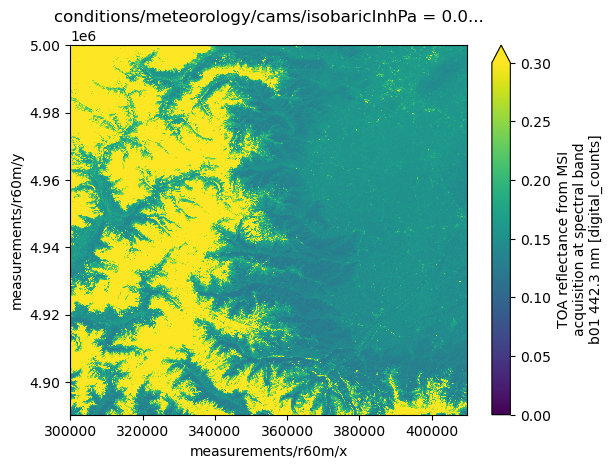

In [29]:
ds["measurements/r60m/b01"].plot(vmin=0., vmax=0.3)

---
### Sentinel-1 GRD

In [30]:
%%time
path = (
    "s3://e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/"
    "cpm_v253/S1A_IW_GRDH_1SDV_20240201T164915_20240201T164940_052368_065517_750E.zarr"
)

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 7.15 μs


In [31]:
%%time
dt = xr.open_datatree(path, engine="eopf-zarr", op_mode="native", chunks={})
dt

CPU times: user 351 ms, sys: 16.8 ms, total: 368 ms
Wall time: 6.26 s


<xarray.DataTree>
Group: /
│   Attributes:
│       other_metadata:  {'azimuth_steering_rate': 0.0, 'eopf_category': 'eoconta...
│       stac_discovery:  {'assets': {}, 'bbox': [18.626646, 39.456726, 15.211703,...
├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH
│   │   Attributes:
│   │       other_metadata:  {'azimuth_steering_rate': 0.0, 'downlink_information': {...
│   │       stac_discovery:  {'assets': {}, 'bbox': [18.626646, 39.456726, 15.211703,...
│   ├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH/conditions
│   │   ├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH/conditions/antenna_pattern
│   │   │       Dimensions:           (azimuth_time: 27, slant_range_time: 720)
│   │   │       Coordinates:
│   │   │         * azimuth_time      (azimuth_time) datetime64[ns] 216B 2024-02-01T16:49:15....
│   │   │           slant_range_time  (azimuth_time, slant_range_time) float32 78kB dask.array<chunksize=(27, 720), meta=np.ndarray>
│   │   │       Data variables:
│   │   │           elevation_angle   (azimuth_time, slant_range_time) float32 78kB dask.array<chunksize=(27, 720), meta=np.ndarray>
│   │   │           incidence_angle   (azimuth_time, slant_range_time) float32 78kB dask.array<chunksize=(27, 720), meta=np.ndarray>
│   │   │           roll              (azimuth_time) float32 108B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   │           terrain_height    (azimuth_time) float32 108B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH/conditions/attitude
│   │   │       Dimensions:       (azimuth_time: 25)
│   │   │       Coordinates:
│   │   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2024-02-01T16:49:15.8750...
│   │   │       Data variables:
│   │   │           pitch         (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q0            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q1            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q2            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q3            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           roll          (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wx            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wy            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wz            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           yaw           (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH/conditions/azimuth_fm_rate
│   │   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │   │       Coordinates:
│   │   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2024-02-01T...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float32 120B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │   │           t0                          (azimuth_time) float32 40B dask.array<chunksize=(10,), meta=np.ndarray>
│   │   ...
│   │   ├── Group: /S01SIWGRD_20240201T164915_0025_A299_750E_065517_VH/conditions/reference_replica
│   │   │       Dimensions:                                   (azimuth_time: 3, degree: 4)
│   │   │       Coordinates:
│   │   │         * azimuth_time                              (azimuth_time) datetime64[ns] 24B ...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           reference_replica_amplitude_coefficients

In [34]:
%%time
ds = xr.open_dataset(path, engine="eopf-zarr", op_mode="native", chunks={})
ds

CPU times: user 327 ms, sys: 12.1 ms, total: 339 ms
Wall time: 3.3 s


<xarray.Dataset> Size: 2GB
Dimensions:                                                                   (
                                                                               VH_conditions_antenna_pattern_azimuth_time: 27,
                                                                               VH_conditions_antenna_pattern_slant_range_time: 720,
                                                                               VH_conditions_attitude_azimuth_time: 25,
                                                                               VH_conditions_azimuth_fm_rate_azimuth_time: 10,
                                                                               VH_conditions_azimuth_fm_rate_degree: 3,
                                                                               ...
                                                                               VV_conditions_terrain_height_azimuth_time: 5,
                                                                               VV_measurements_azimuth_time: 16675,
                                                                               VV_measurements_ground_range: 26456,
                                                                               VV_quality_calibration_azimuth_time: 27,
                                                                               VV_quality_calibration_ground_range: 663,
                                                                               VV_quality_noise_azimuth_time: 797)
Coordinates: (12/36)
  * VH_conditions_antenna_pattern_azimuth_time                                (VH_conditions_antenna_pattern_azimuth_time) datetime64[ns] 216B ...
    VH_conditions_antenna_pattern_slant_range_time                            (VH_conditions_antenna_pattern_azimuth_time, VH_conditions_antenna_pattern_slant_range_time) float32 78kB dask.array<chunksize=(27, 720), meta=np.ndarray>
  * VH_conditions_attitude_azimuth_time                                       (VH_conditions_attitude_azimuth_time) datetime64[ns] 200B ...
  * VH_conditions_azimuth_fm_rate_azimuth_time                                (VH_conditions_azimuth_fm_rate_azimuth_time) datetime64[ns] 80B ...
  * VH_conditions_coordinate_conversion_azimuth_time                          (VH_conditions_coordinate_conversion_azimuth_time) datetime64[ns] 224B ...
  * VH_conditions_doppler_centroid_azimuth_time                               (VH_conditions_doppler_centroid_azimuth_time) datetime64[ns] 216B ...
    ...                                                                        ...
  * VV_measurements_azimuth_time                                              (VV_measurements_azimuth_time) datetime64[ns] 133kB ...
  * VV_quality_calibration_azimuth_time                                       (VV_quality_calibration_azimuth_time) datetime64[ns] 216B ...
  * VV_quality_calibration_ground_range                                       (VV_quality_calibration_ground_range) float32 3kB ...
    VV_quality_calibration_line                                               (VV_quality_calibration_azimuth_time) int32 108B dask.array<chunksize=(27,), meta=np.ndarray>
    VV_quality_calibration_pixel                                              (VV_quality_calibration_ground_range) int32 3kB dask.array<chunksize=(663,), meta=np.ndarray>
  * VV_quality_noise_azimuth_time                                             (VV_quality_noise_azimuth_time) datetime64[ns] 6kB ...
Dimensions without coordinates: VH_conditions_azimuth_fm_rate_degree,
                                VH_conditions_coordinate_conversion_degree,
                                VH_conditions_doppler_centroid_degree,
                                VH_conditions_orbit_axis,
                                VH_conditions_reference_replica_degree,
                                VH_measurements_ground_range,
                                VV_conditions_azimuth_fm_rate_degree,
                                VV_con

%%time
ds["VH_measurements_grd"][::10, ::10].plot(vmax=200)

---
## Open the product in analysis mode

So far the analysis mode is only implemented for Sentinel-2 products. The analysis mode will be extended to Sentinel-3 and Sentinel-1 in the upcoming releases. 

The analysis mode aims at representing the EOPF data products in an analysis-ready and convenient form using the xarray data models Dataset. It uses a unified grid mapping for all their data variables. This means that selected variables are spatially up-scaled or down-scaled as needed, so that the dataset can use a single shared pair of x and y coordinates in the returned datasets.

### Sentinel-2 L2A

In [4]:
%%time
path = (
    "https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:202504-s02msil2a/"
    "15/products/cpm_v256/S2B_MSIL2A_20250415T142749_N0511_R139_T25WEV_20250415T181516.zarr"
)

CPU times: user 3 μs, sys: 1e+03 ns, total: 4 μs
Wall time: 6.44 μs


The analysis mode for Sentinel-2 has the following properties:

* Default mode of operation when using the `"eopf-zarr"` backend.
* User can choose between 10m, 20m, and 60m spatial resolution; defaults set to 10m.
* Upsampling is done by a 2D interpolation governed by the keyword argument `spline_orders`, which can be a single spline order for all variables or a dictionary that maps a spline order to applicable variable names or array data types; the `spline_order` can be set to 0 (nearest neighbor), 1 (linear), 2 (bi-linear), or 3 (cubic). The default is 3, except for product specific overrides. For example, the Sentinel-2 variable `scl` uses the default 0.
* Downsampling is done by aggregation methods, and can be governed by the keyword argument `agg_methods`, which can be a single aggregation method for all variables or a dictionary that maps an aggregation method to applicable variable names or array data types; an aggregation method is one of "center", "count", "first", "last", "max", "mean", "median", "mode", "min", "prod", "std", "sum", or "var". The default is "mean", except for product specific overrides. For example, the Sentinel-2 variable scl uses the default "center".
* specific variables can be selected via the keywork argument `variables`, which can be a name or regex pattern or iterable of the latter.

More information are given in the documentation: https://eopf-sample-service.github.io/xarray-eopf/api/#xarray_eopf.backend.EopfBackend.open_dataset


First without any specific keyword argument, a `xr.Dataset` is returned with 10m spatial resolution for all sprectral bands. 

In [6]:
%%time
ds_default = xr.open_dataset(path, engine="eopf-zarr", chunks={})
ds_default

CPU times: user 224 ms, sys: 14.2 ms, total: 238 ms
Wall time: 3.42 s


<xarray.Dataset> Size: 12GB
Dimensions:      (x: 10980, y: 10980)
Coordinates:
  * x            (x) int64 88kB 499985 499995 500005 ... 609755 609765 609775
  * y            (y) int64 88kB 8000035 8000025 8000015 ... 7890255 7890245
    band         int64 8B ...
    spatial_ref  int64 8B ...
Data variables: (12/15)
    b01          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b02          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b03          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b04          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b05          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b06          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    ...           ...
    b11          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b12          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b8a          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    cld          (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    scl          (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    snw          (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
Attributes: (12/34)
    AOT_retrieval_model:                                                     ...
    L0_ancillary_data_quality:                                               ...
    L0_ephemeris_data_quality:                                               ...
    NUC_table_ID:                                                            ...
    SWIR_rearrangement_flag:                                                 ...
    UTM_zone_identification:                                                 ...
    ...                                                                                                       ...
    ozone_value:                                                             ...
    percentage_of_degraded_MSI_data:                                         ...
    planimetric_stability_assessment_from_AOCS:                              ...
    product_quality_status:                                                  ...
    reflectance_correction_factor_from_the_Sun-Earth_distance_variation_compu...
    spectral_band_of_reference:                                              ...

Now we can start configuring the processing with the provided keyword arguments.

In [16]:
%%time
ds_nearest = xr.open_dataset(path, engine="eopf-zarr", chunks={}, spline_orders=0, variables=["b01", "b02", "scl"])
ds_nearest

CPU times: user 196 ms, sys: 11.5 ms, total: 207 ms
Wall time: 2.89 s


<xarray.Dataset> Size: 2GB
Dimensions:      (x: 10980, y: 10980)
Coordinates:
  * x            (x) int64 88kB 499985 499995 500005 ... 609755 609765 609775
  * y            (y) int64 88kB 8000035 8000025 8000015 ... 7890255 7890245
    spatial_ref  int64 8B ...
Data variables:
    b01          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    b02          (y, x) float64 964MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    scl          (y, x) uint8 121MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
Attributes: (12/34)
    AOT_retrieval_model:                                                     ...
    L0_ancillary_data_quality:                                               ...
    L0_ephemeris_data_quality:                                               ...
    NUC_table_ID:                                                            ...
    SWIR_rearrangement_flag:                                                 ...
    UTM_zone_identification:                                                 ...
    ...                                                                                                       ...
    ozone_value:                                                             ...
    percentage_of_degraded_MSI_data:                                         ...
    planimetric_stability_assessment_from_AOCS:                              ...
    product_quality_status:                                                  ...
    reflectance_correction_factor_from_the_Sun-Earth_distance_variation_compu...
    spectral_band_of_reference:                                              ...

We can now compare the different upsampling methods:

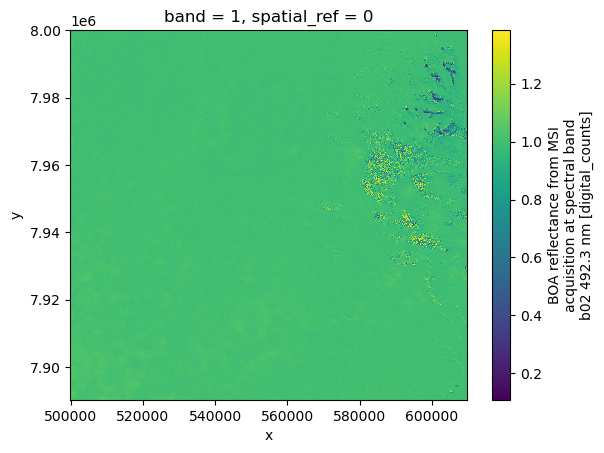

In [14]:
ds_default.b02[::10, ::10].plot()

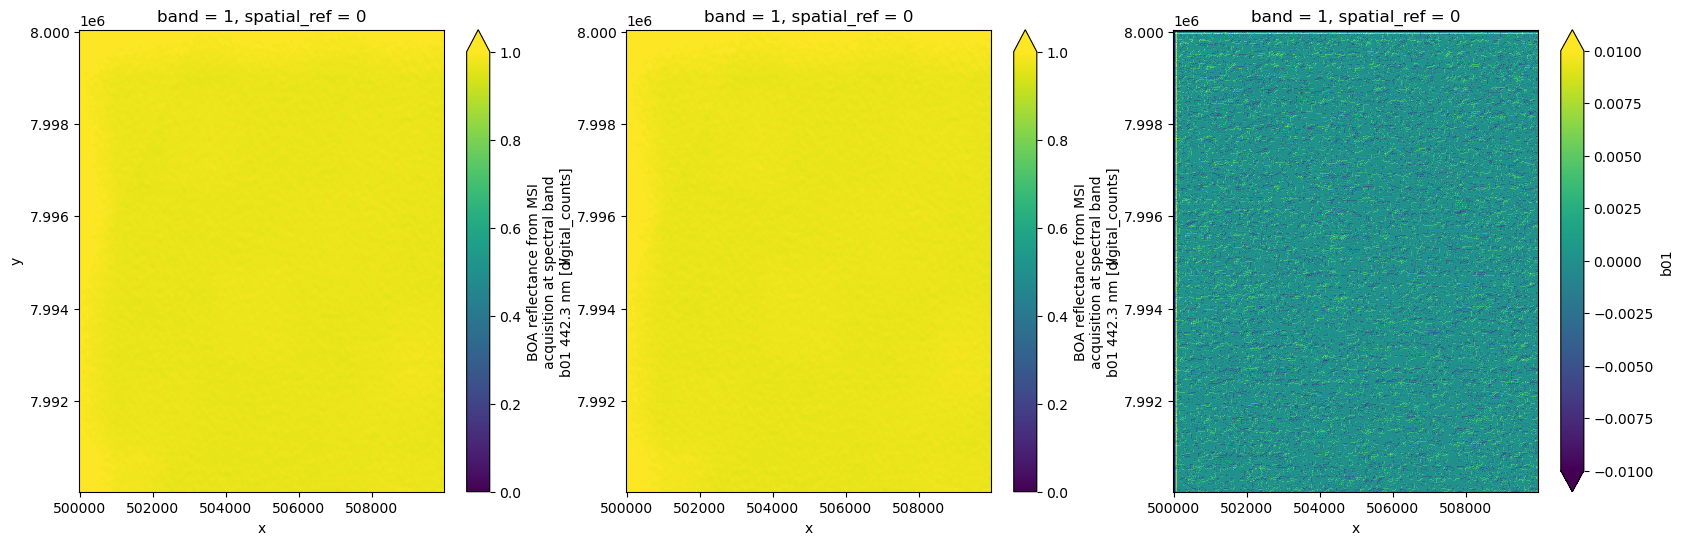

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ds_default.b01[:1000, :1000].plot(ax=ax[0], vmin=0, vmax=1.)
ds_nearest.b01[:1000, :1000].plot(ax=ax[1], vmin=0, vmax=1.)
(ds_default.b01 - ds_nearest.b01)[:1000, :1000].plot(ax=ax[2], vmin=-0.01, vmax=0.01)

Plot SCL with color code

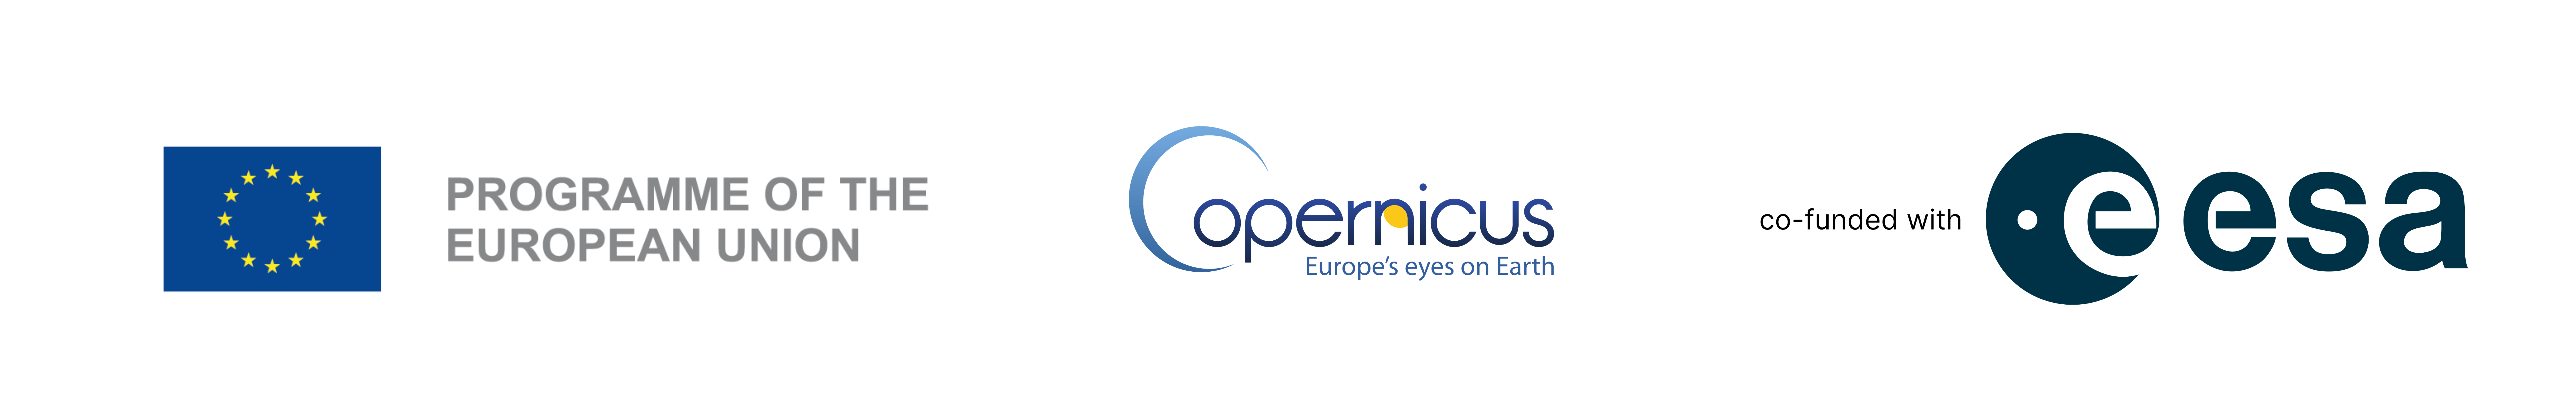